In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('votes.csv')
df.head()

df.columns

Index(['id', 'user_id', 'vote', 'meta_id', 'vote_date', 'username',
       'timestamp', 'ip_str', 'org', 'org_clean', 'isp', 'data', 'port',
       'hostnames', 'domains', 'city', 'region_code', 'latitude', 'longitude',
       'os', 'device', 'devicetype', 'cpe23', 'http', 'vulns', 'vulns_scores'],
      dtype='object')

In [3]:
df.columns

Index(['id', 'user_id', 'vote', 'meta_id', 'vote_date', 'username',
       'timestamp', 'ip_str', 'org', 'org_clean', 'isp', 'data', 'port',
       'hostnames', 'domains', 'city', 'region_code', 'latitude', 'longitude',
       'os', 'device', 'devicetype', 'cpe23', 'http', 'vulns', 'vulns_scores'],
      dtype='object')

In [4]:
df_org = pd.read_csv('organizations.csv')
row = df_org[df_org['org_name'] == 'OURINET TELECOM']

row


,uuid,ip_str,port,org,org_name,cloud computing,internet service provider,store,security,research,healthcare,bank,education,military,government


In [5]:
filtered_first_table = df_org.drop(columns=['uuid'])
filtered_first_table = filtered_first_table.rename(columns={'org_name': 'org_m'})
filtered_second_table = df.rename(columns={'org': 'org_m'})
filtered_second_table

,id,user_id,vote,meta_id,vote_date,username,timestamp,ip_str,org_m,org_clean,...,region_code,latitude,longitude,os,device,devicetype,cpe23,http,vulns,vulns_scores
0,1,7,6,01J19HAN87WR2MNHHX15HSPHZ5,2024-09-06,thelegendofgab,2024-06-26T05:47:05.351616,52.67.146.242,Amazon Data Services Brazil,AMAZON DATA SERVICES BRAZIL,...,SP,-23.54750,-46.63611,NaN,NaN,NaN,['cpe:2.3:a:eclipse:jetty:9.4.21' 'cpe:2.3:a:g...,"{""status"":""200"",""title"":""Mirth Connect Adminis...","[{'cve_id': 'CVE-2023-36478', 'cvss_score': 7....","{'cve_id': array(['CVE-2023-36478', 'CVE-2020-..."
1,2,7,5,01J19851HG5RZ4V3M4FJDGQRSE,2024-09-06,thelegendofgab,2024-06-26T03:06:44.144869,191.194.128.150,TELEFÔNICA BRASIL S.A,TELEFONICA BRASIL,...,PE,-8.05389,-34.88111,NaN,NaN,NaN,cpe:2.3:a:f5:nginx:1.12.2,"{""status"":""200"",""host"":""191.194.128.150"",""serv...","[{'cve_id': 'CVE-2019-9516', 'cvss_score': 6.5...","{'cve_id': array(['CVE-2019-9516', 'CVE-2019-9..."
2,3,7,7,01J1BFKGBH1ZTFCE8811GXKV1E,2024-09-06,thelegendofgab,2024-06-26T23:55:26.961499,131.221.236.27,OuriNet TELECOM,OURINET TELECOM,...,PE,-7.88250,-40.08167,NaN,NaN,NaN,['cpe:2.3:a:apache:http_server' 'cpe:2.3:a:php...,"{""status"":""404"",""title"":""Page Not Found"",""host...","[{'cve_id': 'CVE-2020-7060', 'cvss_score': 9.1...","{'cve_id': array(['CVE-2020-7060', 'CVE-2020-1..."
3,5,7,8,01J197CN8R8F686X1X4B9STPGE,2024-09-06,thelegendofgab,2024-06-26T02:53:25.144024,15.228.189.192,Amazon Data Services Brazil,AMAZON DATA SERVICES BRAZIL,...,SP,-23.54750,-46.63611,NaN,NaN,NaN,cpe:2.3:a:php:php:5.4.45,"{""status"":""200"",""title"":""NSA320S"",""host"":""15.2...","[{'cve_id': 'CVE-2016-7414', 'cvss_score': 9.8...","{'cve_id': array(['CVE-2016-7414', 'CVE-2016-5..."
4,4,7,9,01J192TK940R0CT8VM23S00AKM,2024-09-06,thelegendofgab,2024-06-26T01:33:38.980115,52.67.20.116,Amazon Data Services Brazil,AMAZON DATA SERVICES BRAZIL,...,SP,-23.54750,-46.63611,NaN,NaN,NaN,['cpe:2.3:a:apache:http_server' 'cpe:2.3:a:dok...,"{""status"":""200"",""title"":""Últimas Modificações:...","[{'cve_id': 'CVE-2019-9021', 'cvss_score': 9.8...","{'cve_id': array(['CVE-2019-9021', 'CVE-2018-5..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1118,1255,6,4,01J19HQBVGDG9BSATBYCDT4257,2024-10-23,chicoin,2024-06-26T05:54:01.712319,54.233.220.241,Amazon Data Services Brazil,AMAZON DATA SERVICES BRAZIL,...,SP,-23.54750,-46.63611,NaN,NaN,NaN,['cpe:2.3:a:apache:http_server:2.4.29' 'cpe:2....,"{""status"":""200"",""title"":""MeuEducador - Gestão ...","[{'cve_id': 'CVE-2021-44224', 'cvss_score': 8....","{'cve_id': array(['CVE-2021-44224', 'CVE-2019-..."
1119,1256,6,3,01J18ZKEA1GQ9RTG24S7ZJR6XT,2024-10-23,chicoin,2024-06-26T00:37:18.785808,45.137.28.138,GLS Consultoria,GLS CONSULTORIA,...,SP,-23.54750,-46.63611,NaN,NaN,NaN,cpe:2.3:a:apache:http_server:2.4.38,"{""status"":""200"",""title"":""ESATEL DIGITAL"",""host...","[{'cve_id': 'CVE-2022-22721', 'cvss_score': 9....","{'cve_id': array(['CVE-2022-22721', 'CVE-2021-..."
1120,1257,6,4,01J1991RWDDA71S7K52K1AWEG1,2024-10-23,chicoin,2024-06-26T03:22:25.549967,45.231.205.180,MINISTERIO DO MEIO AMBIENTE,MINISTERIO DO MEIO AMBIENTE,...,DF,-15.77972,-47.92972,NaN,NaN,NaN,['cpe:2.3:a:apache:http_server:2.4.37' 'cpe:2....,"{""status"":""200"",""title"":""MantisBT"",""host"":""45....","[{'cve_id': 'CVE-2022-22721', 'cvss_score': 9....","{'cve_id': array(['CVE-2022-22721', 'CVE-2018-..."
1121,1258,6,2,01J1AQBE8SPV54K3R0X8G2F7EN,2024-10-23,chicoin,2024-06-26T16:51:36.857735,186.235.160.14,SATURNO COMUNICAÇÕES LTDA,SATURNO COMUNICACOES,...,BA,-17.53500,-39.74194,NaN,NaN,NaN,cpe:2.3:a:apache:http_server:2.4.18,"{""status"":""302"",""host"":""186.235.160.14"",""serve...","[{'cve_id': 'CVE-2017-9788', 'cvss_score': 9.1...","{'cve_id': array(['CVE-2017-9788', 'CVE-2019-0..."


In [6]:
merged_table = pd.merge(filtered_second_table, filtered_first_table, on=['org_m', 'ip_str'], how='left')

merged_table

,id,user_id,vote,meta_id,vote_date,username,timestamp,ip_str,org_m,org_clean,...,cloud computing,internet service provider,store,security,research,healthcare,bank,education,military,government
0,1,7,6,01J19HAN87WR2MNHHX15HSPHZ5,2024-09-06,thelegendofgab,2024-06-26T05:47:05.351616,52.67.146.242,Amazon Data Services Brazil,AMAZON DATA SERVICES BRAZIL,...,0.788773,0.031545,0.016700,0.116006,0.016923,0.005996,0.005969,0.006002,0.005130,0.006955
1,2,7,5,01J19851HG5RZ4V3M4FJDGQRSE,2024-09-06,thelegendofgab,2024-06-26T03:06:44.144869,191.194.128.150,TELEFÔNICA BRASIL S.A,TELEFONICA BRASIL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,7,7,01J1BFKGBH1ZTFCE8811GXKV1E,2024-09-06,thelegendofgab,2024-06-26T23:55:26.961499,131.221.236.27,OuriNet TELECOM,OURINET TELECOM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,7,8,01J197CN8R8F686X1X4B9STPGE,2024-09-06,thelegendofgab,2024-06-26T02:53:25.144024,15.228.189.192,Amazon Data Services Brazil,AMAZON DATA SERVICES BRAZIL,...,0.788773,0.031545,0.016700,0.116006,0.016923,0.005996,0.005969,0.006002,0.005130,0.006955
4,5,7,8,01J197CN8R8F686X1X4B9STPGE,2024-09-06,thelegendofgab,2024-06-26T02:53:25.144024,15.228.189.192,Amazon Data Services Brazil,AMAZON DATA SERVICES BRAZIL,...,0.856038,0.016585,0.009686,0.019918,0.024797,0.009928,0.008441,0.027203,0.008904,0.018499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2066,1255,6,4,01J19HQBVGDG9BSATBYCDT4257,2024-10-23,chicoin,2024-06-26T05:54:01.712319,54.233.220.241,Amazon Data Services Brazil,AMAZON DATA SERVICES BRAZIL,...,0.064666,0.009502,0.033778,0.003474,0.006544,0.002961,0.002828,0.869181,0.003075,0.003992
2067,1256,6,3,01J18ZKEA1GQ9RTG24S7ZJR6XT,2024-10-23,chicoin,2024-06-26T00:37:18.785808,45.137.28.138,GLS Consultoria,GLS CONSULTORIA,...,0.208620,0.080179,0.155930,0.155573,0.121085,0.043847,0.055425,0.064893,0.048646,0.065802
2068,1257,6,4,01J1991RWDDA71S7K52K1AWEG1,2024-10-23,chicoin,2024-06-26T03:22:25.549967,45.231.205.180,MINISTERIO DO MEIO AMBIENTE,MINISTERIO DO MEIO AMBIENTE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2069,1258,6,2,01J1AQBE8SPV54K3R0X8G2F7EN,2024-10-23,chicoin,2024-06-26T16:51:36.857735,186.235.160.14,SATURNO COMUNICAÇÕES LTDA,SATURNO COMUNICACOES,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
columns_to_fill = ['cloud computing', 'internet service provider', 'store', 'security',
                   'research', 'healthcare', 'bank', 'education', 'military', 'government']

merged_table[columns_to_fill] = merged_table.groupby('org_m')[columns_to_fill].transform(
    lambda x: x.fillna(method='ffill').fillna(method='bfill')
)


merged_table

/tmp/ipykernel_432297/4205532506.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  lambda x: x.fillna(method='ffill').fillna(method='bfill')
/tmp/ipykernel_432297/4205532506.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  lambda x: x.fillna(method='ffill').fillna(method='bfill')


,id,user_id,vote,meta_id,vote_date,username,timestamp,ip_str,org_m,org_clean,...,cloud computing,internet service provider,store,security,research,healthcare,bank,education,military,government
0,1,7,6,01J19HAN87WR2MNHHX15HSPHZ5,2024-09-06,thelegendofgab,2024-06-26T05:47:05.351616,52.67.146.242,Amazon Data Services Brazil,AMAZON DATA SERVICES BRAZIL,...,0.788773,0.031545,0.016700,0.116006,0.016923,0.005996,0.005969,0.006002,0.005130,0.006955
1,2,7,5,01J19851HG5RZ4V3M4FJDGQRSE,2024-09-06,thelegendofgab,2024-06-26T03:06:44.144869,191.194.128.150,TELEFÔNICA BRASIL S.A,TELEFONICA BRASIL,...,0.049252,0.175602,0.185757,0.051400,0.092291,0.023017,0.035678,0.031729,0.312583,0.042692
2,3,7,7,01J1BFKGBH1ZTFCE8811GXKV1E,2024-09-06,thelegendofgab,2024-06-26T23:55:26.961499,131.221.236.27,OuriNet TELECOM,OURINET TELECOM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,7,8,01J197CN8R8F686X1X4B9STPGE,2024-09-06,thelegendofgab,2024-06-26T02:53:25.144024,15.228.189.192,Amazon Data Services Brazil,AMAZON DATA SERVICES BRAZIL,...,0.788773,0.031545,0.016700,0.116006,0.016923,0.005996,0.005969,0.006002,0.005130,0.006955
4,5,7,8,01J197CN8R8F686X1X4B9STPGE,2024-09-06,thelegendofgab,2024-06-26T02:53:25.144024,15.228.189.192,Amazon Data Services Brazil,AMAZON DATA SERVICES BRAZIL,...,0.856038,0.016585,0.009686,0.019918,0.024797,0.009928,0.008441,0.027203,0.008904,0.018499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2066,1255,6,4,01J19HQBVGDG9BSATBYCDT4257,2024-10-23,chicoin,2024-06-26T05:54:01.712319,54.233.220.241,Amazon Data Services Brazil,AMAZON DATA SERVICES BRAZIL,...,0.064666,0.009502,0.033778,0.003474,0.006544,0.002961,0.002828,0.869181,0.003075,0.003992
2067,1256,6,3,01J18ZKEA1GQ9RTG24S7ZJR6XT,2024-10-23,chicoin,2024-06-26T00:37:18.785808,45.137.28.138,GLS Consultoria,GLS CONSULTORIA,...,0.208620,0.080179,0.155930,0.155573,0.121085,0.043847,0.055425,0.064893,0.048646,0.065802
2068,1257,6,4,01J1991RWDDA71S7K52K1AWEG1,2024-10-23,chicoin,2024-06-26T03:22:25.549967,45.231.205.180,MINISTERIO DO MEIO AMBIENTE,MINISTERIO DO MEIO AMBIENTE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2069,1258,6,2,01J1AQBE8SPV54K3R0X8G2F7EN,2024-10-23,chicoin,2024-06-26T16:51:36.857735,186.235.160.14,SATURNO COMUNICAÇÕES LTDA,SATURNO COMUNICACOES,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
merged_table.columns

Index(['id', 'user_id', 'vote', 'meta_id', 'vote_date', 'username',
       'timestamp', 'ip_str', 'org_m', 'org_clean', 'isp', 'data', 'port_x',
       'hostnames', 'domains', 'city', 'region_code', 'latitude', 'longitude',
       'os', 'device', 'devicetype', 'cpe23', 'http', 'vulns', 'vulns_scores',
       'port_y', 'org', 'cloud computing', 'internet service provider',
       'store', 'security', 'research', 'healthcare', 'bank', 'education',
       'military', 'government'],
      dtype='object')

In [9]:
merged_table = merged_table.dropna(subset=['cloud computing'])

In [10]:
merged_table_all = merged_table

In [13]:
merged_table_all["username"] = "ALL"

/tmp/ipykernel_432297/1304986488.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_table_all["username"] = "ALL"


In [14]:
merged_table_all

,id,user_id,vote,meta_id,vote_date,username,timestamp,ip_str,org_m,org_clean,...,cloud computing,internet service provider,store,security,research,healthcare,bank,education,military,government
0,1,7,6,01J19HAN87WR2MNHHX15HSPHZ5,2024-09-06,ALL,2024-06-26T05:47:05.351616,52.67.146.242,Amazon Data Services Brazil,AMAZON DATA SERVICES BRAZIL,...,0.788773,0.031545,0.016700,0.116006,0.016923,0.005996,0.005969,0.006002,0.005130,0.006955
1,2,7,5,01J19851HG5RZ4V3M4FJDGQRSE,2024-09-06,ALL,2024-06-26T03:06:44.144869,191.194.128.150,TELEFÔNICA BRASIL S.A,TELEFONICA BRASIL,...,0.049252,0.175602,0.185757,0.051400,0.092291,0.023017,0.035678,0.031729,0.312583,0.042692
3,5,7,8,01J197CN8R8F686X1X4B9STPGE,2024-09-06,ALL,2024-06-26T02:53:25.144024,15.228.189.192,Amazon Data Services Brazil,AMAZON DATA SERVICES BRAZIL,...,0.788773,0.031545,0.016700,0.116006,0.016923,0.005996,0.005969,0.006002,0.005130,0.006955
4,5,7,8,01J197CN8R8F686X1X4B9STPGE,2024-09-06,ALL,2024-06-26T02:53:25.144024,15.228.189.192,Amazon Data Services Brazil,AMAZON DATA SERVICES BRAZIL,...,0.856038,0.016585,0.009686,0.019918,0.024797,0.009928,0.008441,0.027203,0.008904,0.018499
5,5,7,8,01J197CN8R8F686X1X4B9STPGE,2024-09-06,ALL,2024-06-26T02:53:25.144024,15.228.189.192,Amazon Data Services Brazil,AMAZON DATA SERVICES BRAZIL,...,0.856038,0.016585,0.009686,0.019918,0.024797,0.009928,0.008441,0.027203,0.008904,0.018499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2062,1251,6,6,01J1APGBHYM9JD6D2RPYKRP9JR,2024-10-23,ALL,2024-06-26T16:36:49.342541,18.228.68.61,Amazon Data Services Brazil,AMAZON DATA SERVICES BRAZIL,...,0.499622,0.175290,0.130885,0.022211,0.038804,0.032985,0.030165,0.029312,0.021724,0.019002
2063,1252,6,2,01J19XFB8K1DEBB0DMHSYYX0ZS,2024-10-23,ALL,2024-06-26T09:19:21.875196,140.238.238.149,Oracle Public Cloud,ORACLE PUBLIC CLOUD,...,0.882372,0.010208,0.009888,0.010433,0.046748,0.006398,0.007861,0.008515,0.007336,0.010243
2064,1253,6,3,01J19W6PZK883BBX6P3A515189,2024-10-23,ALL,2024-06-26T08:57:10.387211,177.153.50.242,Locaweb Serviços de Internet S/A,LOCAWEB SERVICOS DE INTERNET,...,0.092046,0.707750,0.084611,0.016650,0.010424,0.029746,0.034720,0.009812,0.006839,0.007403
2066,1255,6,4,01J19HQBVGDG9BSATBYCDT4257,2024-10-23,ALL,2024-06-26T05:54:01.712319,54.233.220.241,Amazon Data Services Brazil,AMAZON DATA SERVICES BRAZIL,...,0.064666,0.009502,0.033778,0.003474,0.006544,0.002961,0.002828,0.869181,0.003075,0.003992


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

In [18]:
def extract_features(row, include_vote=True):
    org_types = ["cloud computing", "internet service provider", "store", "security", 
                 "research", "healthcare", "bank", "education", "military", "government"]

    org_type_features = {org_type: row.get(org_type, 0) for org_type in org_types}
    
    features = {
        "port": row.get("port_x", row.get("port", 0)),
        "hostnames": len(row["hostnames"].split(",")) if pd.notna(row["hostnames"]) else 0,
        "domains": len(row["domains"].split(",")) if pd.notna(row["domains"]) else 0,
        "device": row.get("device", 0),
        "devicetype": row.get("devicetype", 0),
        "score": row.get("score", 0),
        "NumVulnerabilities": len(row["vulns"].split(",")) if pd.notna(row["vulns"]) else 0,
        "NumCritical": sum(1 for vuln in row["vulns"].split(",") if "Critical" in vuln) if pd.notna(row["vulns"]) else 0,
        "NumHigh": sum(1 for vuln in row["vulns"].split(",") if "High" in vuln) if pd.notna(row["vulns"]) else 0
    }
    
    features.update(org_type_features)
    
    if include_vote and "vote" in row:
        features["Vote"] = int(row["vote"])
    
    return features

In [19]:
def extract_prediction_features(row):
    org_types = ["cloud computing", "internet service provider", "store", "security", 
                 "research", "healthcare", "bank", "education", "military", "government"]
    org_type_features = {org_type: row.get(org_type, 0) for org_type in org_types}

    features = {
        "port": row["port_x"],
        "hostnames": len(row["hostnames"].split(",")) if pd.notna(row["hostnames"]) else 0,
        "domains": len(row["domains"].split(",")) if pd.notna(row["domains"]) else 0,
        "device": row.get("device", "unknown"),
        "devicetype": row.get("devicetype", "unknown"),
        "vulns": len(row["vulns"].split(",")) if pd.notna(row["vulns"]) else 0,
    }
    features.update(org_type_features)
    return features

In [20]:
sampled_data = pd.read_csv('merged_df.csv')

In [21]:
new_features = sampled_data.apply(extract_prediction_features, axis=1)
new_features_df = pd.DataFrame(new_features.tolist())

In [22]:
sampled_data = pd.read_csv('merged_df.csv')

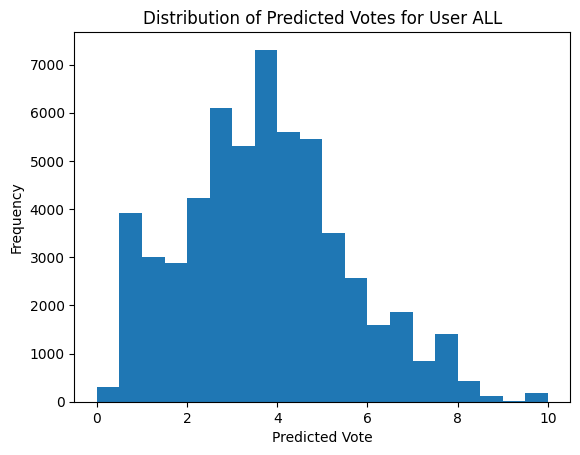

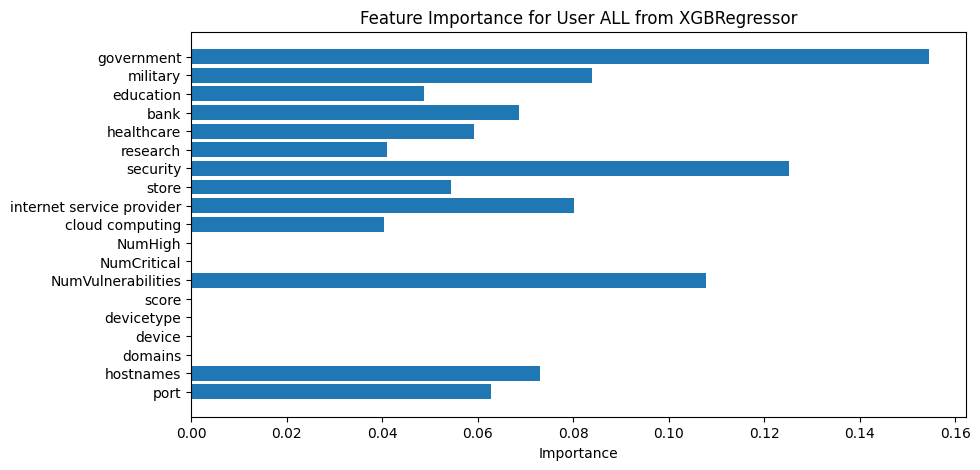

                       meta_id                         timestamp  \
0   01J18XRAQMM5BPR9DQX9XDZCH2  2024-06-26 00:05:01.812494+00:00   
1   01J18YM6W000QGYH6WA701FPGC  2024-06-26 00:20:15.360307+00:00   
2   01J18YM6W000QGYH6WA701FPGC  2024-06-26 00:20:15.360307+00:00   
3   01J18YM6W000QGYH6WA701FPGC  2024-06-26 00:20:15.360307+00:00   
4   01J18YQMCJ1QRJP345XV1X3XYK  2024-06-26 00:22:07.506616+00:00   
5   01J190D9N95DCT36RCWW6CMSBQ  2024-06-26 00:51:25.993327+00:00   
6   01J190D9N95DCT36RCWW6CMSBQ  2024-06-26 00:51:25.993327+00:00   
7   01J190Q29GH897MJ9TV3NT2A45  2024-06-26 00:56:46.128369+00:00   
8   01J190SPFMH5HYNJKKH5N84M84  2024-06-26 00:58:12.340519+00:00   
9   01J19166FS4HGXF9HQHCFTAADV  2024-06-26 01:05:01.945805+00:00   
10  01J19166FS4HGXF9HQHCFTAADV  2024-06-26 01:05:01.945805+00:00   
11  01J19166FS4HGXF9HQHCFTAADV  2024-06-26 01:05:01.945805+00:00   
12  01J19166FS4HGXF9HQHCFTAADV  2024-06-26 01:05:01.945805+00:00   
13  01J19166FS4HGXF9HQHCFTAADV  2024-06-26 01:05

In [23]:
for user in merged_table_all["username"].unique():
    filtered_table = merged_table[merged_table["username"] == user]

    training_features = filtered_table.apply(lambda row: extract_features(row, include_vote=True), axis=1)
    training_df = pd.DataFrame(training_features.tolist())

    for col in ["device", "devicetype"]:
        training_df[col] = training_df[col].astype("category").cat.codes

    X_train = training_df.drop(columns=["Vote"], errors='ignore')
    y_train = training_df["Vote"]
    
    model = XGBRegressor(n_estimators=100000, learning_rate=0.1, max_depth=30, verbosity=0, random_state=70)
    model.fit(X_train, y_train)
    
    new_features = sampled_data.apply(lambda row: extract_features(row, include_vote=False), axis=1)
    new_features_df = pd.DataFrame(new_features.tolist())
    
    for col in ["device", "devicetype"]:
        new_features_df[col] = new_features_df[col].astype("category").cat.codes
    
    predictions = model.predict(new_features_df)
    sampled_data[f'predicted_vote_{user}'] = predictions
    
    plt.hist(predictions, bins=20)
    plt.xlabel("Predicted Vote")
    plt.ylabel("Frequency")
    plt.title(f"Distribution of Predicted Votes for User {user}")
    plt.show()
    
    plt.figure(figsize=(10, 5))
    plt.barh(X_train.columns, model.feature_importances_)
    plt.xlabel("Importance")
    plt.title(f"Feature Importance for User {user} from XGBRegressor")
    plt.show()

print(sampled_data.head(20))

In [26]:
sampled_data.columns

Index(['meta_id', 'timestamp', 'ip_str', 'org_m', 'org_clean', 'isp', 'data',
       'port_x', 'hostnames', 'domains', 'city', 'region_code', 'latitude',
       'longitude', 'os', 'device', 'devicetype', 'cpe23', 'http', 'vulns',
       'score', 'port_y', 'org', 'cloud computing',
       'internet service provider', 'store', 'security', 'research',
       'healthcare', 'bank', 'education', 'military', 'government',
       'user_name', 'predicted_vote_ALL'],
      dtype='object')

In [27]:
sampled_data

,meta_id,timestamp,ip_str,org_m,org_clean,isp,data,port_x,hostnames,domains,...,store,security,research,healthcare,bank,education,military,government,user_name,predicted_vote_ALL
0,01J18XRAQMM5BPR9DQX9XDZCH2,2024-06-26 00:05:01.812494+00:00,15.228.182.151,Amazon Data Services Brazil,AMAZON DATA SERVICES BRAZIL,"Amazon.com, Inc.",HTTP/1.1 404 Not Found\r\nAccess-Control-Allow...,80,['ec2-15-228-182-151.sa-east-1.compute.amazona...,['amazonaws.com'],...,0.013089,0.058872,0.035083,0.006731,0.005565,0.006194,0.006081,0.007539,cunha,3.043323
1,01J18YM6W000QGYH6WA701FPGC,2024-06-26 00:20:15.360307+00:00,200.145.252.62,UNIVERSIDADE ESTADUAL PAULISTA,UNIVERSIDADE ESTADUAL PAULISTA,UNIVERSIDADE ESTADUAL PAULISTA,"HTTP/1.1 200 OK\r\nDate: Wed, 26 Jun 2024 00:2...",443,['srv-pabx.rosana.unesp.br' 'b062.rosana.unesp...,['unesp.br'],...,0.079557,0.098736,0.164566,0.030894,0.039887,0.321823,0.035906,0.051429,cunha,3.859196
2,01J18YM6W000QGYH6WA701FPGC,2024-06-26 00:20:15.360307+00:00,200.145.252.62,UNIVERSIDADE ESTADUAL PAULISTA,UNIVERSIDADE ESTADUAL PAULISTA,UNIVERSIDADE ESTADUAL PAULISTA,"HTTP/1.1 200 OK\r\nDate: Wed, 26 Jun 2024 00:2...",443,['srv-pabx.rosana.unesp.br' 'b062.rosana.unesp...,['unesp.br'],...,0.079557,0.098736,0.164566,0.030894,0.039887,0.321823,0.035906,0.051429,cunha,3.859196
3,01J18YM6W000QGYH6WA701FPGC,2024-06-26 00:20:15.360307+00:00,200.145.252.62,UNIVERSIDADE ESTADUAL PAULISTA,UNIVERSIDADE ESTADUAL PAULISTA,UNIVERSIDADE ESTADUAL PAULISTA,"HTTP/1.1 200 OK\r\nDate: Wed, 26 Jun 2024 00:2...",443,['srv-pabx.rosana.unesp.br' 'b062.rosana.unesp...,['unesp.br'],...,0.079557,0.098736,0.164566,0.030894,0.039887,0.321823,0.035906,0.051429,cunha,3.859196
4,01J18YQMCJ1QRJP345XV1X3XYK,2024-06-26 00:22:07.506616+00:00,18.230.199.39,Amazon Data Services Brazil,AMAZON DATA SERVICES BRAZIL,"Amazon.com, Inc.","HTTP/1.1 200 OK\r\nDate: Wed, 26 Jun 2024 00:2...",119,['ec2-18-230-199-39.sa-east-1.compute.amazonaw...,['amazonaws.com'],...,0.013089,0.058872,0.035083,0.006731,0.005565,0.006194,0.006081,0.007539,cunha,2.729411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56657,01J1BDS1KDG1508C1WM3RP3VS3,2024-06-26 23:23:31.309352+00:00,200.150.205.220,Vieira Arts Ltda ME,VIEIRA ARTS,Saveincloud Hospedagem na Internet Ltda,"220 kingpage4.com.br ESMTP Exim 4.94.2 Wed, 26...",25,['www.kingpage4.com.br' 'kingpage4.com.br' 'ma...,['kingpage4.com.br' 'mandaguacu.pr.gov.br'],...,0.011118,0.014779,0.043879,0.009766,0.011696,0.010594,0.041220,0.817827,cunha,2.953151
56658,01J1BE9B2NX9JDAP2DBFXAWF99,2024-06-26 23:32:25.301403+00:00,187.85.181.181,UNIFIQUE TELECOMUNICACOES S/A,UNIFIQUE TELECOMUNICACOES,UNIFIQUE TELECOMUNICACOES S/A,HTTP/1.1 400 Bad Request\r\nServer: nginx/1.18...,8080,['mail.elevencorporation.com.br'],['elevencorporation.com.br'],...,0.027440,0.115231,0.013488,0.004553,0.006736,0.006231,0.005586,0.012826,cunha,3.619006
56659,01J1BF71Z9Z69FT3PTF7NGPFZ5,2024-06-26 23:48:39.017095+00:00,166.0.189.145,ELGAE HOST - Hospedagem de jogos e Datacenter,ELGAE HOST HOSPEDAGEM DE JOGOS E DATACENTER,Ecxon Datacenter LTDA,"HTTP/1.1 200 OK\r\nDate: Wed, 26 Jun 2024 23:4...",443,NaN,NaN,...,0.029541,0.589807,0.030295,0.021274,0.027461,0.028117,0.017089,0.020984,cunha,1.995258
56660,01J1BFHTWEHP1DXFJ35NHTG226,2024-06-26 23:54:32.206030+00:00,200.17.168.33,Universidade Federal do Rio Grande do Sul,UNIVERSIDADE FEDERAL DO RIO GRANDE DO SUL,Universidade Federal do Rio Grande do Sul,"HTTP/1.1 200 OK\r\nDate: Wed, 26 Jun 2024 23:5...",443,['importacaoaluno.urcamp.edu.br' 'autenticacao...,['urcamp.edu.br'],...,0.004901,0.004880,0.074908,0.005851,0.003817,0.862891,0.004009,0.024607,cunha,4.558239


In [29]:
sampled_data2 = sampled_data

sampled_data2 = sampled_data2.drop(columns=['vulns', 'http', 'predicted_vote'])

KeyError: "['predicted_vote'] not found in axis"

In [30]:


sampled_data2 = sampled_data2.sort_values(by="predicted_vote", ascending=False)

KeyError: 'predicted_vote'

In [31]:
sampled_data2

,meta_id,timestamp,ip_str,org_m,org_clean,isp,data,port_x,hostnames,domains,...,store,security,research,healthcare,bank,education,military,government,user_name,predicted_vote_ALL
0,01J18XRAQMM5BPR9DQX9XDZCH2,2024-06-26 00:05:01.812494+00:00,15.228.182.151,Amazon Data Services Brazil,AMAZON DATA SERVICES BRAZIL,"Amazon.com, Inc.",HTTP/1.1 404 Not Found\r\nAccess-Control-Allow...,80,['ec2-15-228-182-151.sa-east-1.compute.amazona...,['amazonaws.com'],...,0.013089,0.058872,0.035083,0.006731,0.005565,0.006194,0.006081,0.007539,cunha,3.043323
1,01J18YM6W000QGYH6WA701FPGC,2024-06-26 00:20:15.360307+00:00,200.145.252.62,UNIVERSIDADE ESTADUAL PAULISTA,UNIVERSIDADE ESTADUAL PAULISTA,UNIVERSIDADE ESTADUAL PAULISTA,"HTTP/1.1 200 OK\r\nDate: Wed, 26 Jun 2024 00:2...",443,['srv-pabx.rosana.unesp.br' 'b062.rosana.unesp...,['unesp.br'],...,0.079557,0.098736,0.164566,0.030894,0.039887,0.321823,0.035906,0.051429,cunha,3.859196
2,01J18YM6W000QGYH6WA701FPGC,2024-06-26 00:20:15.360307+00:00,200.145.252.62,UNIVERSIDADE ESTADUAL PAULISTA,UNIVERSIDADE ESTADUAL PAULISTA,UNIVERSIDADE ESTADUAL PAULISTA,"HTTP/1.1 200 OK\r\nDate: Wed, 26 Jun 2024 00:2...",443,['srv-pabx.rosana.unesp.br' 'b062.rosana.unesp...,['unesp.br'],...,0.079557,0.098736,0.164566,0.030894,0.039887,0.321823,0.035906,0.051429,cunha,3.859196
3,01J18YM6W000QGYH6WA701FPGC,2024-06-26 00:20:15.360307+00:00,200.145.252.62,UNIVERSIDADE ESTADUAL PAULISTA,UNIVERSIDADE ESTADUAL PAULISTA,UNIVERSIDADE ESTADUAL PAULISTA,"HTTP/1.1 200 OK\r\nDate: Wed, 26 Jun 2024 00:2...",443,['srv-pabx.rosana.unesp.br' 'b062.rosana.unesp...,['unesp.br'],...,0.079557,0.098736,0.164566,0.030894,0.039887,0.321823,0.035906,0.051429,cunha,3.859196
4,01J18YQMCJ1QRJP345XV1X3XYK,2024-06-26 00:22:07.506616+00:00,18.230.199.39,Amazon Data Services Brazil,AMAZON DATA SERVICES BRAZIL,"Amazon.com, Inc.","HTTP/1.1 200 OK\r\nDate: Wed, 26 Jun 2024 00:2...",119,['ec2-18-230-199-39.sa-east-1.compute.amazonaw...,['amazonaws.com'],...,0.013089,0.058872,0.035083,0.006731,0.005565,0.006194,0.006081,0.007539,cunha,2.729411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56657,01J1BDS1KDG1508C1WM3RP3VS3,2024-06-26 23:23:31.309352+00:00,200.150.205.220,Vieira Arts Ltda ME,VIEIRA ARTS,Saveincloud Hospedagem na Internet Ltda,"220 kingpage4.com.br ESMTP Exim 4.94.2 Wed, 26...",25,['www.kingpage4.com.br' 'kingpage4.com.br' 'ma...,['kingpage4.com.br' 'mandaguacu.pr.gov.br'],...,0.011118,0.014779,0.043879,0.009766,0.011696,0.010594,0.041220,0.817827,cunha,2.953151
56658,01J1BE9B2NX9JDAP2DBFXAWF99,2024-06-26 23:32:25.301403+00:00,187.85.181.181,UNIFIQUE TELECOMUNICACOES S/A,UNIFIQUE TELECOMUNICACOES,UNIFIQUE TELECOMUNICACOES S/A,HTTP/1.1 400 Bad Request\r\nServer: nginx/1.18...,8080,['mail.elevencorporation.com.br'],['elevencorporation.com.br'],...,0.027440,0.115231,0.013488,0.004553,0.006736,0.006231,0.005586,0.012826,cunha,3.619006
56659,01J1BF71Z9Z69FT3PTF7NGPFZ5,2024-06-26 23:48:39.017095+00:00,166.0.189.145,ELGAE HOST - Hospedagem de jogos e Datacenter,ELGAE HOST HOSPEDAGEM DE JOGOS E DATACENTER,Ecxon Datacenter LTDA,"HTTP/1.1 200 OK\r\nDate: Wed, 26 Jun 2024 23:4...",443,NaN,NaN,...,0.029541,0.589807,0.030295,0.021274,0.027461,0.028117,0.017089,0.020984,cunha,1.995258
56660,01J1BFHTWEHP1DXFJ35NHTG226,2024-06-26 23:54:32.206030+00:00,200.17.168.33,Universidade Federal do Rio Grande do Sul,UNIVERSIDADE FEDERAL DO RIO GRANDE DO SUL,Universidade Federal do Rio Grande do Sul,"HTTP/1.1 200 OK\r\nDate: Wed, 26 Jun 2024 23:5...",443,['importacaoaluno.urcamp.edu.br' 'autenticacao...,['urcamp.edu.br'],...,0.004901,0.004880,0.074908,0.005851,0.003817,0.862891,0.004009,0.024607,cunha,4.558239


In [32]:
all_user_results = []

predicted_columns = [
    'predicted_vote_ALL'
]

for predicted_column in predicted_columns:
    if predicted_column in sampled_data2.columns:
        user_data = sampled_data2.sort_values(by=predicted_column, ascending=False)
        
        unique_user_data = user_data.drop_duplicates(subset=predicted_column, keep="first")
        
        top_20 = unique_user_data.head(20)
        
        bottom_20 = unique_user_data.tail(20)
        
        middle_section = unique_user_data.iloc[20:-20]
        middle_20 = middle_section.sample(n=20, random_state=42)
        
        user_result = pd.concat([top_20, middle_20, bottom_20])
        
        user_result['predicted_column'] = predicted_column
        
        all_user_results.append(user_result)

final_result = pd.concat(all_user_results).reset_index(drop=True)

final_result

,meta_id,timestamp,ip_str,org_m,org_clean,isp,data,port_x,hostnames,domains,...,security,research,healthcare,bank,education,military,government,user_name,predicted_vote_ALL,predicted_column
0,01J197YYE0AT2MF020EFAZD10Q,2024-06-26 03:03:24.352755+00:00,200.189.123.110,CIA. DE TECNOL. DA INFOR. E COMUNICAÇÃO DO PARANÁ,CIA DE TECNOL DA INFOR E COMUNICACAO DO PARANA,CIA. DE TECNOL. DA INFOR. E COMUNICAÇÃO DO PARANÁ,"HTTP/1.1 200 OK\r\nServer: nginx\r\nDate: Wed,...",443,['www.policiacivil.pr.gov.br' 'policiacivil.pr...,['policiacivil.pr.gov.br'],...,0.427636,0.161588,0.011642,0.019809,0.024056,0.044568,0.234024,cunha,10.000176,predicted_vote_ALL
1,01J198TWHPZ0KSTAADQ5B5JX9F,2024-06-26 03:18:39.926475+00:00,200.189.123.110,CIA. DE TECNOL. DA INFOR. E COMUNICAÇÃO DO PARANÁ,CIA DE TECNOL DA INFOR E COMUNICACAO DO PARANA,CIA. DE TECNOL. DA INFOR. E COMUNICAÇÃO DO PARANÁ,"HTTP/1.1 200 OK\r\nServer: nginx\r\nDate: Wed,...",443,['www.conseg.pr.gov.br' 'conseg.pr.gov.br'],['conseg.pr.gov.br'],...,0.423651,0.176929,0.026146,0.017447,0.028743,0.029668,0.210029,cunha,10.000121,predicted_vote_ALL
2,01J1ANS65SZ644MEX6J9H89042,2024-06-26 16:24:10.169536+00:00,200.189.123.110,CIA. DE TECNOL. DA INFOR. E COMUNICAÇÃO DO PARANÁ,CIA DE TECNOL DA INFOR E COMUNICACAO DO PARANA,CIA. DE TECNOL. DA INFOR. E COMUNICAÇÃO DO PARANÁ,"HTTP/1.1 200 OK\r\nServer: nginx\r\nDate: Wed,...",443,['www.museuparanaense.pr.gov.br' 'museuparanae...,['museuparanaense.pr.gov.br'],...,0.478456,0.157831,0.011693,0.014274,0.024699,0.031097,0.212954,cunha,10.000111,predicted_vote_ALL
3,01J198TWHPZ0KSTAADQ5B5JX9F,2024-06-26 03:18:39.926475+00:00,200.189.123.110,CIA. DE TECNOL. DA INFOR. E COMUNICAÇÃO DO PARANÁ,CIA DE TECNOL DA INFOR E COMUNICACAO DO PARANA,CIA. DE TECNOL. DA INFOR. E COMUNICAÇÃO DO PARANÁ,"HTTP/1.1 200 OK\r\nServer: nginx\r\nDate: Wed,...",443,['www.conseg.pr.gov.br' 'conseg.pr.gov.br'],['conseg.pr.gov.br'],...,0.300307,0.155847,0.009288,0.010006,0.021882,0.211429,0.236352,cunha,10.000084,predicted_vote_ALL
4,01J1B0CVP9VKD0D06FZ8E3RJCB,2024-06-26 19:29:40.553934+00:00,200.189.123.110,CIA. DE TECNOL. DA INFOR. E COMUNICAÇÃO DO PARANÁ,CIA DE TECNOL DA INFOR E COMUNICACAO DO PARANA,CIA. DE TECNOL. DA INFOR. E COMUNICAÇÃO DO PARANÁ,"HTTP/1.1 200 OK\r\nServer: nginx\r\nDate: Wed,...",443,['cjap.pr.gov.br' 'www.cjap.pr.gov.br'],['cjap.pr.gov.br'],...,0.390200,0.146612,0.011040,0.011661,0.022784,0.022999,0.324145,cunha,10.000023,predicted_vote_ALL
5,01J1ANS65SZ644MEX6J9H89042,2024-06-26 16:24:10.169536+00:00,200.189.123.110,CIA. DE TECNOL. DA INFOR. E COMUNICAÇÃO DO PARANÁ,CIA DE TECNOL DA INFOR E COMUNICACAO DO PARANA,CIA. DE TECNOL. DA INFOR. E COMUNICAÇÃO DO PARANÁ,"HTTP/1.1 200 OK\r\nServer: nginx\r\nDate: Wed,...",443,['www.museuparanaense.pr.gov.br' 'museuparanae...,['museuparanaense.pr.gov.br'],...,0.335421,0.259687,0.014248,0.020231,0.042863,0.055959,0.170679,cunha,9.999839,predicted_vote_ALL
6,01J197YYE0AT2MF020EFAZD10Q,2024-06-26 03:03:24.352755+00:00,200.189.123.110,CIA. DE TECNOL. DA INFOR. E COMUNICAÇÃO DO PARANÁ,CIA DE TECNOL DA INFOR E COMUNICACAO DO PARANA,CIA. DE TECNOL. DA INFOR. E COMUNICAÇÃO DO PARANÁ,"HTTP/1.1 200 OK\r\nServer: nginx\r\nDate: Wed,...",443,['www.policiacivil.pr.gov.br' 'policiacivil.pr...,['policiacivil.pr.gov.br'],...,0.277873,0.112237,0.007817,0.009155,0.017224,0.020098,0.481264,cunha,9.999838,predicted_vote_ALL
7,01J1B0CVP9VKD0D06FZ8E3RJCB,2024-06-26 19:29:40.553934+00:00,200.189.123.110,CIA. DE TECNOL. DA INFOR. E COMUNICAÇÃO DO PARANÁ,CIA DE TECNOL DA INFOR E COMUNICACAO DO PARANA,CIA. DE TECNOL. DA INFOR. E COMUNICAÇÃO DO PARANÁ,"HTTP/1.1 200 OK\r\nServer: nginx\r\nDate: Wed,...",443,['cjap.pr.gov.br' 'www.cjap.pr.gov.br'],['cjap.pr.gov.br'],...,0.603080,0.050273,0.005175,0.005248,0.008504,0.009275,0.261889,cunha,9.999827,predicted_vote_ALL
8,01J1B0CVP9VKD0D06FZ8E3RJCB,2024-06-26 19:29:40.553934+00:00,200.189.123.110,CIA. DE TECNOL. DA INFOR. E COMUNICAÇÃO DO PARANÁ,CIA DE TECNOL DA INFOR E COMUNICACAO DO PARANA,CIA. DE TECN

In [ ]:
final_result.to_csv("predicted_votes_all.csv")

In [ ]:
new_features = sampled_data.apply(extract_features, axis=1)
new_features_df = pd.DataFrame(new_features.tolist())

KeyError: 'vote'

In [ ]:
sampled_data['user_id'] = "1"
sampled_data['user_name'] = "cunha"

In [ ]:
sampled_data = pd.read_csv('merged_df.csv')


In [ ]:
sampled_data['user_id'] = "1"

In [ ]:
sampled_data.columns

Index(['meta_id', 'timestamp', 'ip_str', 'org_m', 'org_clean', 'isp', 'data',
       'port_x', 'hostnames', 'domains', 'city', 'region_code', 'latitude',
       'longitude', 'os', 'device', 'devicetype', 'cpe23', 'http', 'vulns',
       'score', 'port_y', 'org', 'cloud computing',
       'internet service provider', 'store', 'security', 'research',
       'healthcare', 'bank', 'education', 'military', 'government',
       'user_name', 'user_id'],
      dtype='object')

In [ ]:
sampled_data = sampled_data.rename(columns={'user_name': 'username'})

<Figure size 1000x600 with 0 Axes>

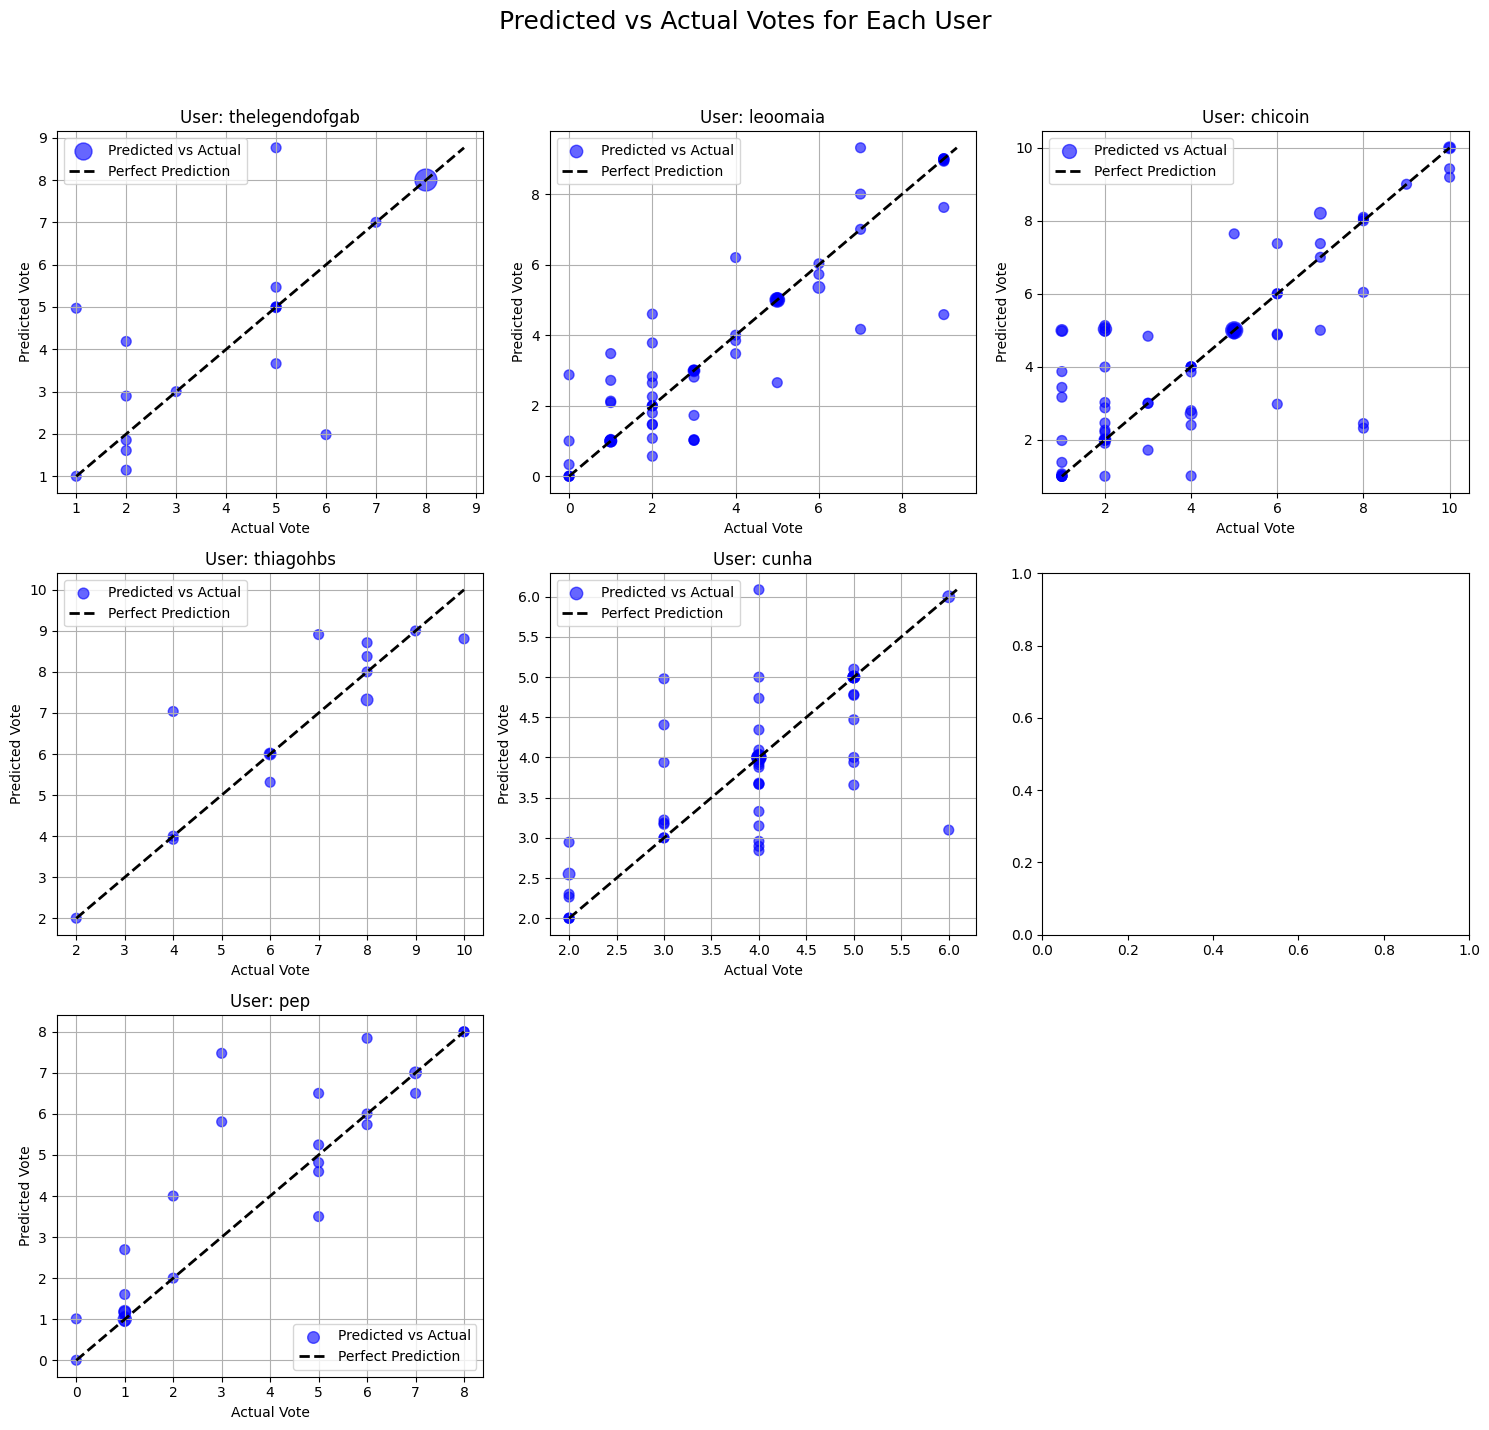

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from collections import Counter


def extract_features(row):
    org_types = ["cloud computing", "internet service provider", "store", "security", 
                 "research", "healthcare", "bank", "education", "military", "government"]

    org_type_features = {org_type: row.get(org_type, 0) for org_type in org_types}
    
    features = {
        "user_id": row["user_id"],
        "ip_str": row["ip_str"],
        "port": row["port_x"],
        "hostnames": len(row["hostnames"].split(",")) if pd.notna(row["hostnames"]) else 0,
        "domains": len(row["domains"].split(",")) if pd.notna(row["domains"]) else 0,
        "device": row["device"],
        "devicetype": row["devicetype"],
        "vulns": len(row["vulns"].split(",")) if pd.notna(row["vulns"]) else 0,
        "user_name": row["username"],
        "Vote": int(row["vote"]),
    }

    features.update(org_type_features)
    return features

features = merged_table.apply(extract_features, axis=1)
features_df = pd.DataFrame(features.tolist())

splits = [0.5, 0.7, 0.8, 0.9, 0.95]
average_rmse_dict = {split: [] for split in splits}
unique_users = features_df['user_name'].unique()

for split in splits:
    for user in unique_users:
        user_accuracies = []
        user_data = features_df[features_df['user_name'] == user]
        if len(user_data) < 2:
            continue

        for iteration in range(5): 
            seed = iteration + 77 
            X = user_data.drop(columns=["ip_str", "user_name", "Vote"])  # Features
            y = user_data["Vote"]  # Target

            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=(1 - split), random_state=seed, shuffle=True
            )

            model = XGBRegressor(n_estimators=1000, learning_rate=0.1, max_depth=15, 
                                 verbosity=0, enable_categorical=True, random_state=seed)
            model.fit(X_train, y_train)

            y_pred = model.predict(X_test)
            mse = mean_squared_error(y_test, y_pred)
            rmse = np.sqrt(mse)
            user_accuracies.append(rmse)

        average_rmse_dict[split].append(np.mean(user_accuracies))

plt.figure(figsize=(10, 6))
x_positions = np.arange(len(splits)) 
user_rmse_dict = {user: [] for user in features_df['user_name'].unique() if user != "admin"}
user_vote_counts = features_df['user_name'].value_counts().to_dict()

for split_index, (split, avg_rmse_list) in enumerate(average_rmse_dict.items()):
    for i, rmse in enumerate(avg_rmse_list):
        user_name = features_df['user_name'].unique()[i]
        if user_name == "admin":
            continue
        user_rmse_dict[user_name].append(rmse)

n_users = len(unique_users)
n_cols = 3  
n_rows = (n_users // n_cols) + int(n_users % n_cols > 0)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5), squeeze=False)
fig.suptitle("Predicted vs Actual Votes for Each User", fontsize=18)

axes = axes.flatten()

for idx, user in enumerate(unique_users):
    user_data = features_df[features_df['user_name'] == user]
    if len(user_data) < 2:
        continue

    X = user_data.drop(columns=["ip_str", "user_name", "Vote"]) 
    y = user_data["Vote"]  # Target

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77, shuffle=True)
    
    model = XGBRegressor(n_estimators=1000, learning_rate=0.1, max_depth=15, 
                         verbosity=0, enable_categorical=True, random_state=77)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    pairs = list(zip(y_test, y_pred))
    pair_counts = Counter(pairs)

    unique_pairs = list(pair_counts.keys())
    actual_vals, predicted_vals = zip(*unique_pairs)
    sizes = [50 + (pair_counts[pair] - 1) * 20 for pair in unique_pairs]

    ax = axes[idx]
    scatter = ax.scatter(actual_vals, predicted_vals, s=sizes, alpha=0.6, color='b', label='Predicted vs Actual')

    min_val = min(min(actual_vals), min(predicted_vals))
    max_val = max(max(actual_vals), max(predicted_vals))
    ax.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2, label='Perfect Prediction')

    ax.set_title(f'User: {user}')
    ax.set_xlabel('Actual Vote')
    ax.set_ylabel('Predicted Vote')
    ax.grid(True)
    ax.legend()

for j in range(idx + 1, n_rows * n_cols):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


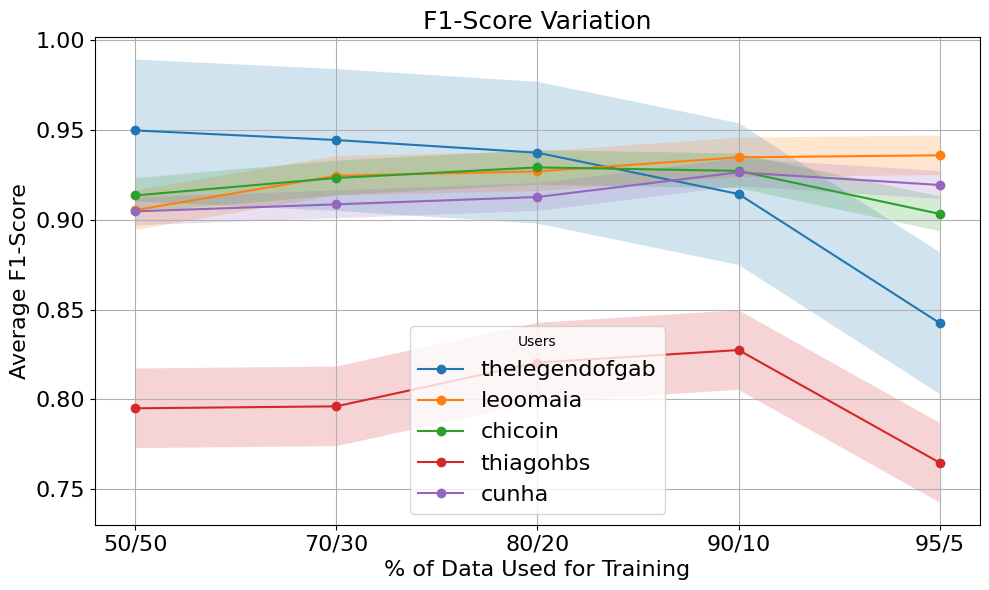

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from xgboost import XGBRegressor

# Adjust to your dataset structure
def extract_features(row):
    org_types = ["cloud computing", "internet service provider", "store", "security", 
                 "research", "healthcare", "bank", "education", "military", "government"]
    
    org_type_features = {org_type: row.get(org_type, 0) for org_type in org_types}
    
    features = {
        "user_id": row["user_id"],
        "ip_str": row["ip_str"],
        "port": row["port_x"],
        "hostnames": len(row["hostnames"].split(",")) if pd.notna(row["hostnames"]) else 0,
        "domains": len(row["domains"].split(",")) if pd.notna(row["domains"]) else 0,
        "device": row["device"],
        "devicetype": row["devicetype"],
        "vulns": len(row["vulns"].split(",")) if pd.notna(row["vulns"]) else 0,
        "user_name": row["username"],
        "Vote": int(row["vote"]),
    }

    features.update(org_type_features)
    return features

features = merged_table.apply(extract_features, axis=1)
features_df = pd.DataFrame(features.tolist())

splits = [0.5, 0.7, 0.8, 0.9, 0.95]
average_f1_dict = {split: [] for split in splits}
unique_users = features_df['user_name'].unique()

for split in splits:
    for user in unique_users:
        user_f1_scores = []
        user_data = features_df[features_df['user_name'] == user]
        if len(user_data) < 2:
            continue

        for iteration in range(5): 
            seed = iteration + 78
            X = user_data.drop(columns=["ip_str", "user_name", "Vote"])  # Features
            y = user_data["Vote"]  # Target
            
            y_binary = (y >= y.median()).astype(int) 
            
            X_train, X_test, y_train, y_test = train_test_split(
                X, y_binary, test_size=(1 - split), random_state=seed, shuffle=True
            )

            model = XGBRegressor(n_estimators=10000, learning_rate=0.1, max_depth=20, 
                                 verbosity=0, enable_categorical=True, random_state=seed)
            model.fit(X_train, y_train)

            y_pred = model.predict(X_test)
            y_pred_binary = (y_pred >= 0.5).astype(int)
            f1 = f1_score(y_test, y_pred_binary)
            user_f1_scores.append(f1)

        average_f1_dict[split].append(np.mean(user_f1_scores))

plt.figure(figsize=(10, 6))
x_positions = np.arange(len(splits))
user_f1_dict = {user: [] for user in features_df['user_name'].unique() if user != "admin"}
user_vote_counts = features_df['user_name'].value_counts().to_dict()

for split_index, (split, avg_f1_list) in enumerate(average_f1_dict.items()):
    for i, f1 in enumerate(avg_f1_list):
        user_name = features_df['user_name'].unique()[i]
        if user_name == "admin":
            continue
        user_f1_dict[user_name].append(f1)

for user, f1_values in user_f1_dict.items():
    if len(f1_values) == len(x_positions):
        avg_f1 = np.mean(f1_values)
        std_dev = np.std(f1_values)
        plt.plot(x_positions, f1_values, linestyle='-', marker='o', label=f"{user}")
        plt.fill_between(x_positions, np.array(f1_values) - std_dev, np.array(f1_values) + std_dev, alpha=0.2)

plt.xticks(x_positions, ['50/50', '70/30', '80/20', '90/10', '95/5'], fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('% of Data Used for Training', fontsize=16)
plt.ylabel('Average F1-Score', fontsize=16)
plt.title('F1-Score Variation', fontsize=18)
plt.legend(fontsize=16, title="Users")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error

def extract_features(row):
    org_types = [
        "cloud computing", "internet service provider", "store", "security", 
        "research", "healthcare", "bank", "education", "military", "government"
    ]
    
    org_type_features = {org_type: row.get(org_type, 0) for org_type in org_types}
    
    features = {
        "user_id": row["user_id"],
        "ip_str": row["ip_str"],
        "port": row["port_x"],
        "hostnames": len(row["hostnames"].split(",")) if pd.notna(row["hostnames"]) else 0,
        "domains": len(row["domains"].split(",")) if pd.notna(row["domains"]) else 0,
        "device": row["device"],
        "devicetype": row["devicetype"],
        "vulns_count": len(row["vulns"].split(",")) if pd.notna(row["vulns"]) else 0,
        "vulns_scores": row["vulns_scores"],
        "vote": int(row["vote"]),
        "username": row["username"]
    }
    
    features.update(org_type_features)
    
    return features

features = merged_table.apply(extract_features, axis=1)
features_df = pd.DataFrame(features.tolist())

param_dist = {
    'n_estimators': [100, 300, 500, 700],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
}

split = 0.8
user_rmse_dict = {}
user_vote_counts = features_df['username'].value_counts().to_dict()

for user in features_df['username'].unique():
    if user == "thelegendofgab":
        continue  # Skip this user

    user_data = features_df[features_df['username'] == user]
    if len(user_data) < 2:
        print(f"Skipping user: {user} due to insufficient data.")
        continue

    user_accuracies = []
    for iteration in range(5): 
        seed = iteration + 33

        X = user_data.drop(columns=["ip_str", "vulns_scores", "username", "vote"])
        y = user_data["vote"]

        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=(1 - split), random_state=seed, shuffle=True
        )

        model = XGBRegressor(enable_categorical=True, random_state=seed)

        random_search = RandomizedSearchCV(
            estimator=model,
            param_distributions=param_dist,
            n_iter=10,
            scoring='neg_mean_squared_error',
            cv=2,
            random_state=seed,
            n_jobs=-1
        )

        random_search.fit(X_train, y_train)
        best_model = random_search.best_estimator_
        y_pred = best_model.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        user_accuracies.append(rmse)

    user_rmse_dict[user] = user_accuracies

user_avg_rmse = {user: np.mean(rmses) for user, rmses in user_rmse_dict.items()}
user_std_rmse = {user: np.std(rmses) for user, rmses in user_rmse_dict.items()}

plt.figure(figsize=(12, 8))
users = list(user_avg_rmse.keys())
avg_rmses = list(user_avg_rmse.values())
std_devs = list(user_std_rmse.values())

plt.bar(users, avg_rmses, yerr=std_devs, capsize=5, color='skyblue', edgecolor='black')
plt.xlabel("User", fontsize=15)
plt.ylabel("Average RMSE", fontsize=15)
plt.title("Average RMSE per User with Error Bars", fontsize=18)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

plt.figure(figsize=(10, 6))
all_rmse_values = [rmse for rmses in user_rmse_dict.values() for rmse in rmses]
plt.boxplot(all_rmse_values, vert=False, patch_artist=True)
plt.xlabel("RMSE", fontsize=15)
plt.title("RMSE Distribution Across All Users", fontsize=18)
plt.tight_layout()

plt.show()


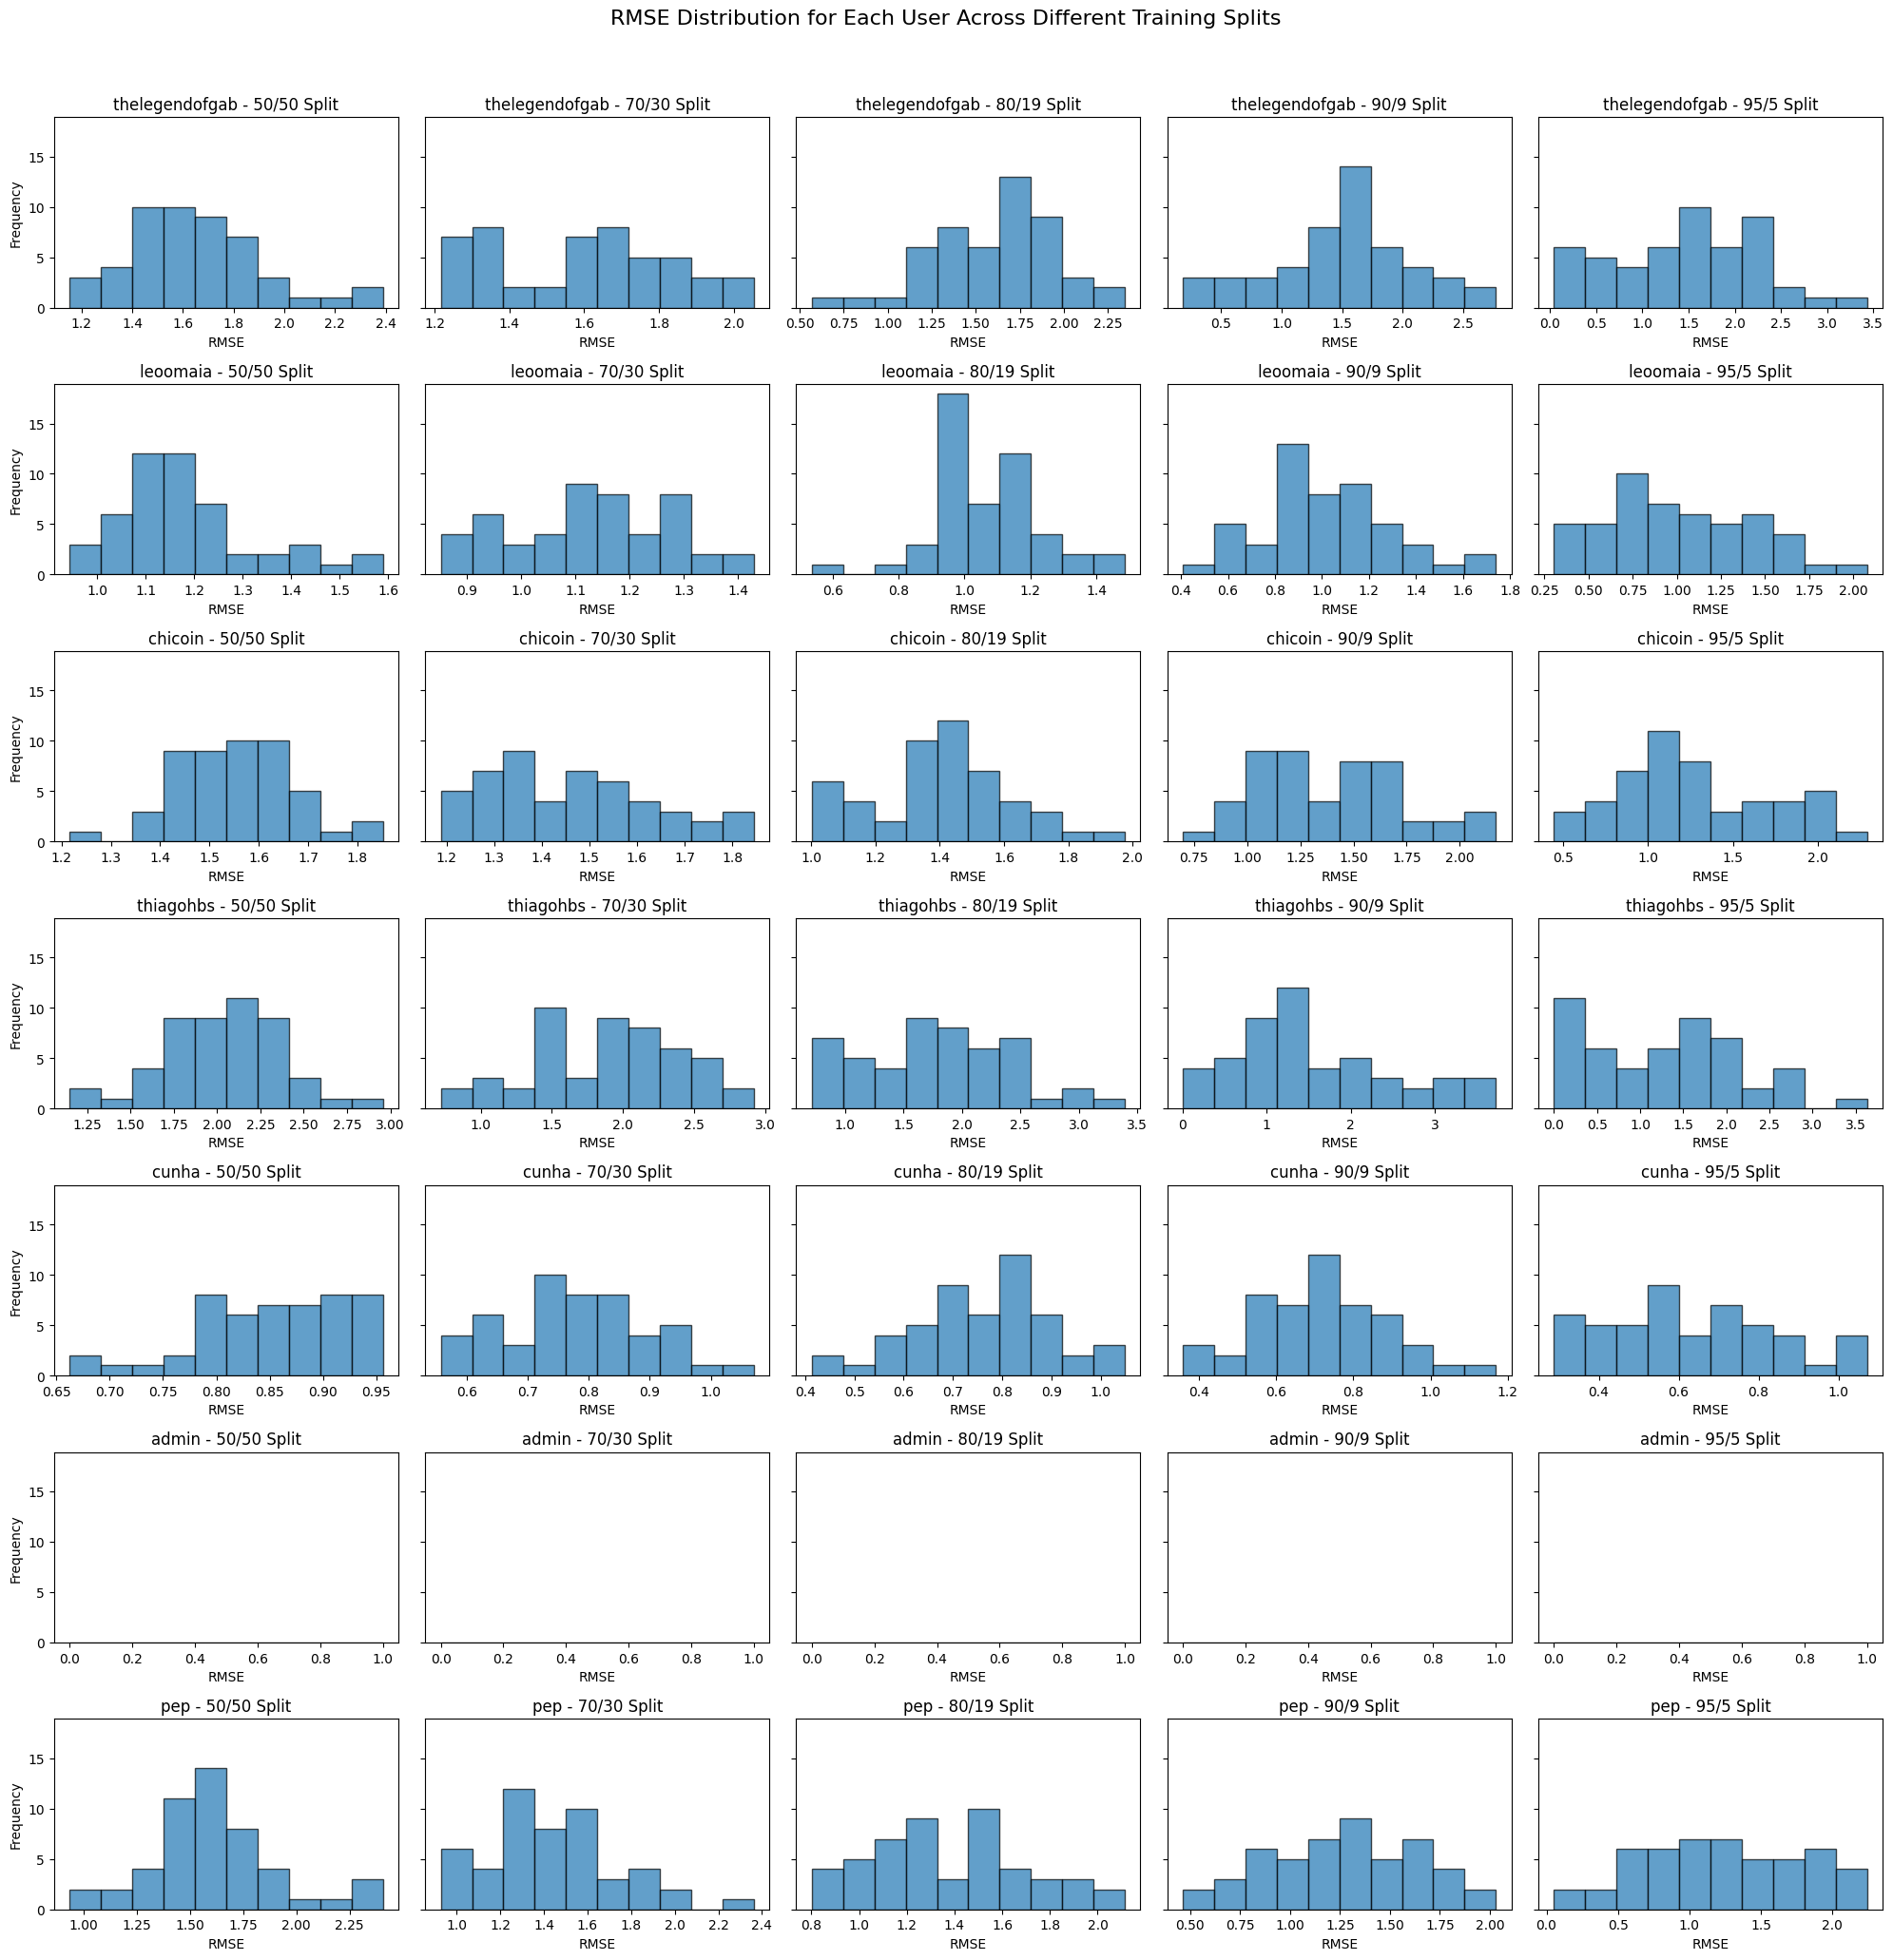

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

def extract_features(row):
    org_types = ["cloud computing", "internet service provider", "store", "security", 
                 "research", "healthcare", "bank", "education", "military", "government"]

    org_type_features = {org_type: row.get(org_type, 0) for org_type in org_types}
    
    features = {
        "user_id": row["user_id"],
        "ip_str": row["ip_str"],
        "port": row["port_x"],
        "hostnames": len(row["hostnames"].split(",")) if pd.notna(row["hostnames"]) else 0,
        "domains": len(row["domains"].split(",")) if pd.notna(row["domains"]) else 0,
        "device": row["device"],
        "devicetype": row["devicetype"],
        "vulns": len(row["vulns"].split(",")) if pd.notna(row["vulns"]) else 0,
        "user_name": row["username"],
        "Vote": int(row["vote"]),
    }

    features.update(org_type_features)
    return features

features = merged_table.apply(extract_features, axis=1)
features_df = pd.DataFrame(features.tolist())

splits = [0.5, 0.7, 0.8, 0.9, 0.95]
user_rmse_dict = {user: {split: [] for split in splits} for user in features_df['user_name'].unique()}

for split in splits:
    for user in user_rmse_dict.keys():
        user_data = features_df[features_df['user_name'] == user]
        if len(user_data) < 2:
            continue

        for iteration in range(50): 
            seed = iteration + 1200 
            X = user_data.drop(columns=["ip_str", "user_name", "Vote"])  # Features
            y = user_data["Vote"]  # Target

            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=(1 - split), random_state=seed, shuffle=True
            )

            model = XGBRegressor(n_estimators=1000, learning_rate=0.1, max_depth=15, 
                                 verbosity=0, enable_categorical=True, random_state=seed)
            model.fit(X_train, y_train)

            y_pred = model.predict(X_test)
            mse = mean_squared_error(y_test, y_pred)
            rmse = np.sqrt(mse)
            user_rmse_dict[user][split].append(rmse)

n_users = len(user_rmse_dict)
fig, axes = plt.subplots(n_users, len(splits), figsize=(20, n_users * 3), sharey=True)
fig.suptitle("RMSE Distribution for Each User Across Different Training Splits", fontsize=16)

for user_idx, (user, split_data) in enumerate(user_rmse_dict.items()):
    for split_idx, (split, rmse_values) in enumerate(split_data.items()):
        ax = axes[user_idx, split_idx] if n_users > 1 else axes[split_idx]
        ax.hist(rmse_values, bins=10, edgecolor='black', alpha=0.7)
        ax.set_title(f"{user} - {int(split * 100)}/{int((1 - split) * 100)} Split")
        ax.set_xlabel("RMSE")
        if split_idx == 0:
            ax.set_ylabel("Frequency")

plt.tight_layout(rect=[0, 0, 1, 0.96]) 
plt.show()


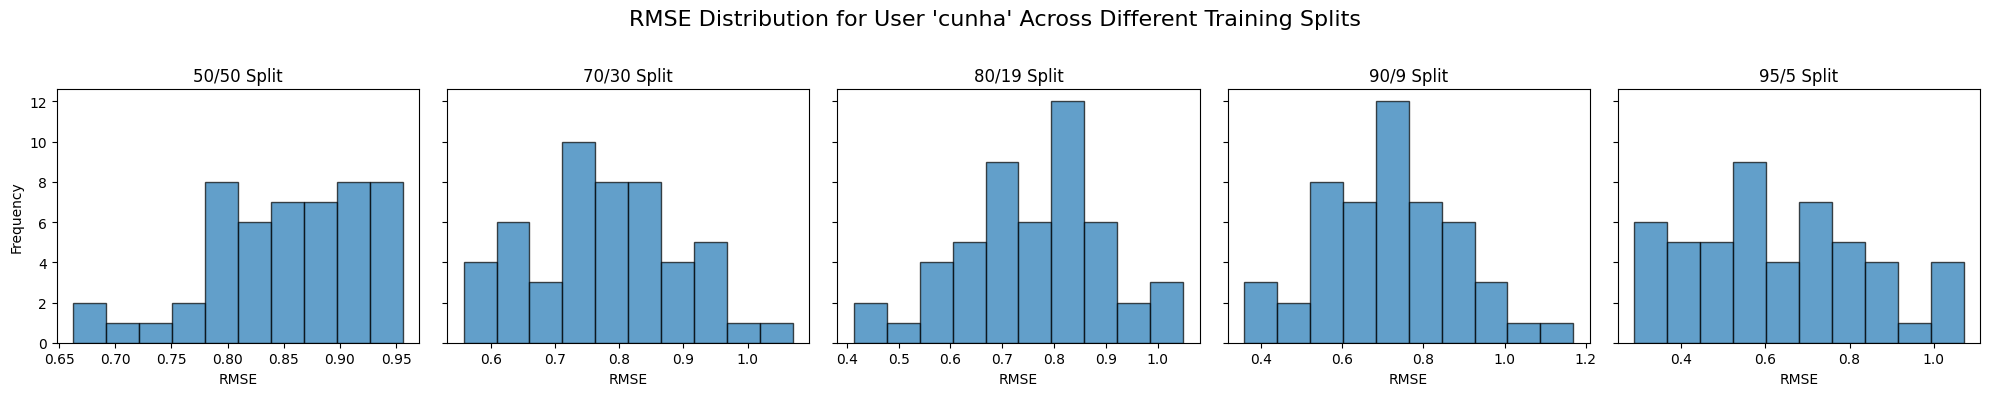

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

def extract_features(row):
    org_types = ["cloud computing", "internet service provider", "store", "security", 
                 "research", "healthcare", "bank", "education", "military", "government"]

    org_type_features = {org_type: row.get(org_type, 0) for org_type in org_types}
    
    features = {
        "user_id": row["user_id"],
        "ip_str": row["ip_str"],
        "port": row["port_x"],
        "hostnames": len(row["hostnames"].split(",")) if pd.notna(row["hostnames"]) else 0,
        "domains": len(row["domains"].split(",")) if pd.notna(row["domains"]) else 0,
        "device": row["device"],
        "devicetype": row["devicetype"],
        "vulns": len(row["vulns"].split(",")) if pd.notna(row["vulns"]) else 0,
        "user_name": row["username"],
        "Vote": int(row["vote"]),
    }

    features.update(org_type_features)
    return features

features = merged_table.apply(extract_features, axis=1)
features_df = pd.DataFrame(features.tolist())

features_df = features_df[features_df['user_name'] == 'cunha']

splits = [0.5, 0.7, 0.8, 0.9, 0.95]
user_rmse_dict = {split: [] for split in splits}

for split in splits:
    user_data = features_df
    if len(user_data) < 2:
        continue

    for iteration in range(50): 
        seed = iteration + 1200 
        X = user_data.drop(columns=["ip_str", "user_name", "Vote"])  # Features
        y = user_data["Vote"]  # Target

        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=(1 - split), random_state=seed, shuffle=True
        )

        model = XGBRegressor(n_estimators=1000, learning_rate=0.1, max_depth=15, 
                             verbosity=0, enable_categorical=True, random_state=seed)
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        user_rmse_dict[split].append(rmse)

fig, axes = plt.subplots(1, len(splits), figsize=(20, 4), sharey=True)
fig.suptitle("RMSE Distribution for User 'cunha' Across Different Training Splits", fontsize=16)

for split_idx, (split, rmse_values) in enumerate(user_rmse_dict.items()):
    ax = axes[split_idx] if len(splits) > 1 else axes
    ax.hist(rmse_values, bins=10, edgecolor='black', alpha=0.7)
    ax.set_title(f"{int(split * 100)}/{int((1 - split) * 100)} Split")
    ax.set_xlabel("RMSE")
    if split_idx == 0:
        ax.set_ylabel("Frequency")

plt.tight_layout(rect=[0, 0, 1, 0.96]) 
plt.show()


<Figure size 1000x600 with 0 Axes>

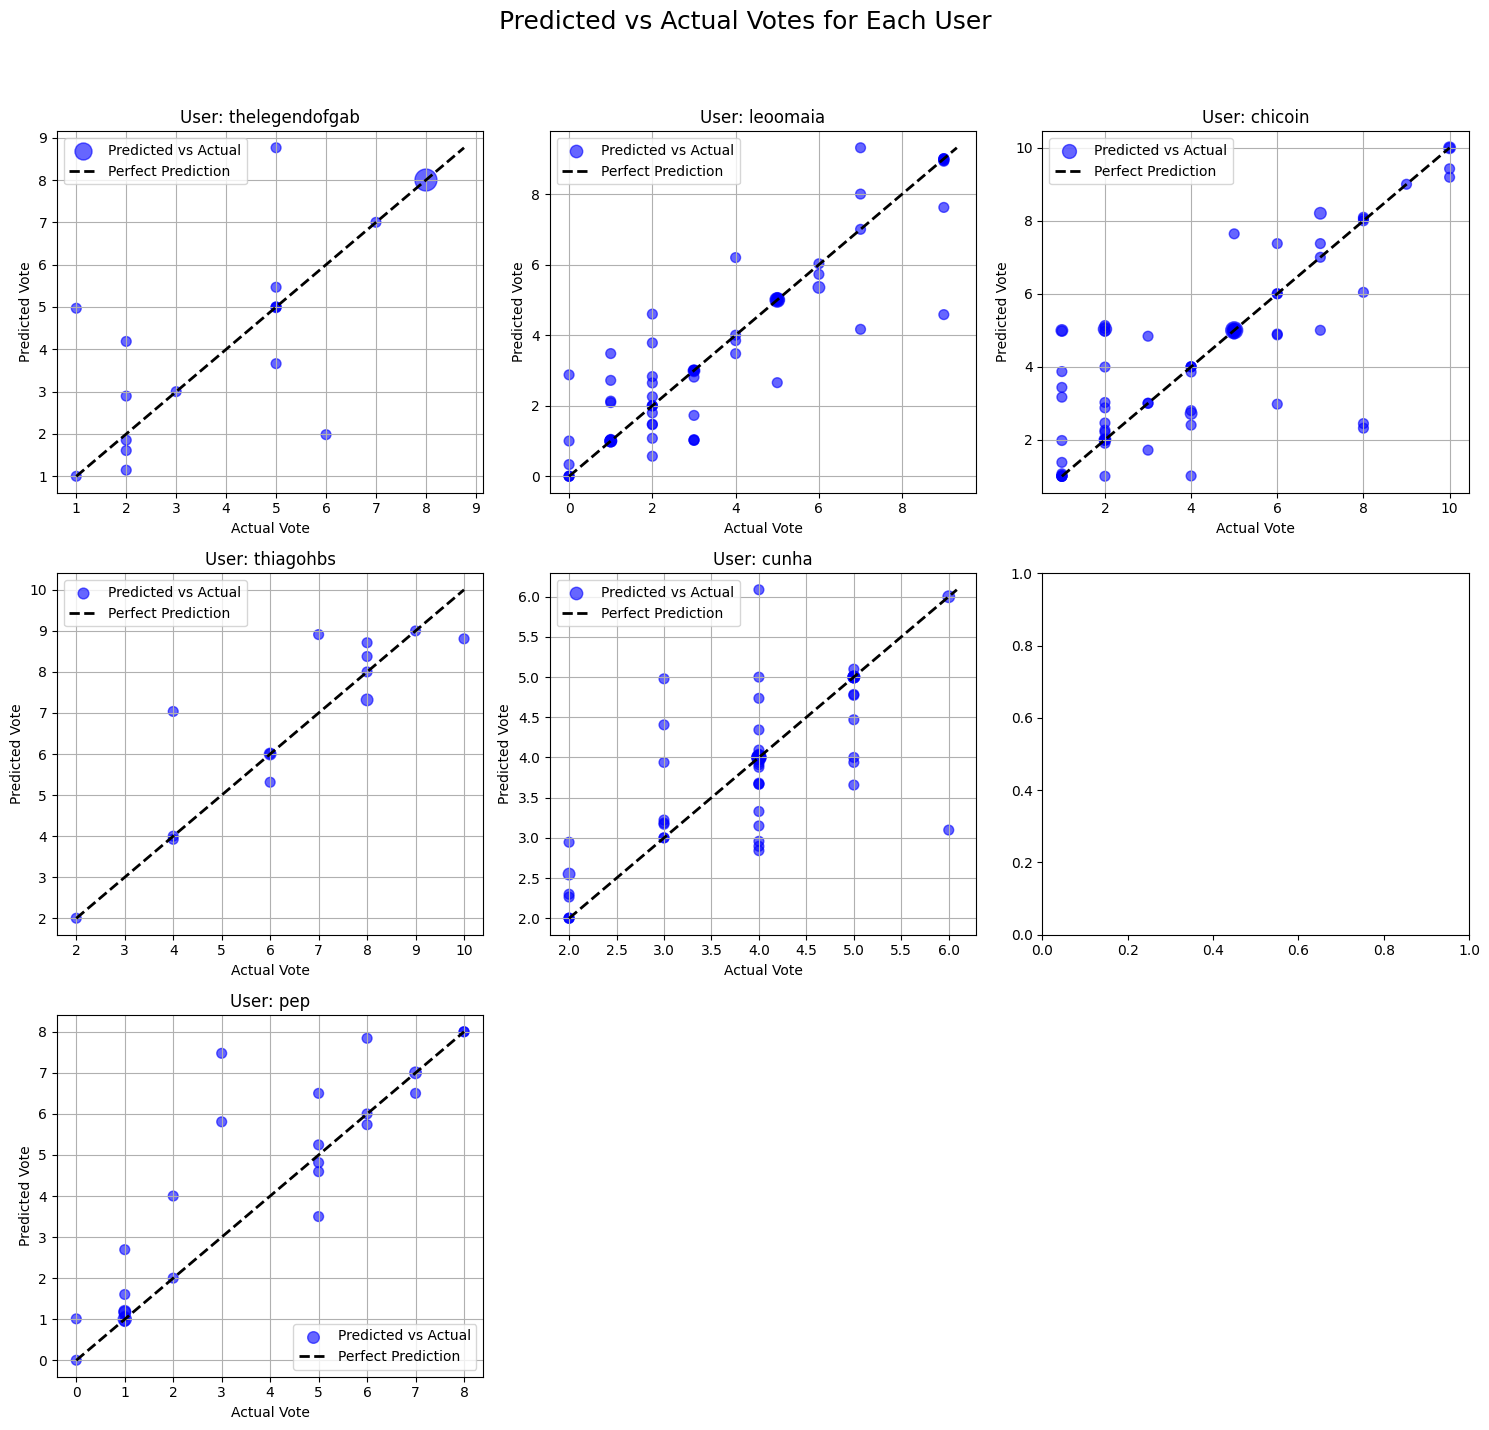

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from collections import Counter
import os
import joblib

os.makedirs("save_model", exist_ok=True)

def extract_features(row):
    org_types = ["cloud computing", "internet service provider", "store", "security", 
                 "research", "healthcare", "bank", "education", "military", "government"]
    
    org_type_features = {org_type: row.get(org_type, 0) for org_type in org_types}
    
    features = {
        "user_id": row["user_id"],
        "ip_str": row["ip_str"],
        "port": row["port_x"],
        "hostnames": len(row["hostnames"].split(",")) if pd.notna(row["hostnames"]) else 0,
        "domains": len(row["domains"].split(",")) if pd.notna(row["domains"]) else 0,
        "device": row["device"],
        "devicetype": row["devicetype"],
        "vulns": len(row["vulns"].split(",")) if pd.notna(row["vulns"]) else 0,
        "user_name": row["username"],
        "Vote": int(row["vote"]),
    }

    features.update(org_type_features)
    return features

features = merged_table.apply(extract_features, axis=1)
features_df = pd.DataFrame(features.tolist())

splits = [0.5, 0.7, 0.8, 0.9, 0.95]
average_rmse_dict = {split: [] for split in splits}
unique_users = features_df['user_name'].unique()

for split in splits:
    for user in unique_users:
        user_accuracies = []
        user_data = features_df[features_df['user_name'] == user]
        if len(user_data) < 2:
            continue

        for iteration in range(5): 
            seed = iteration + 77 
            X = user_data.drop(columns=["ip_str", "user_name", "Vote"])
            y = user_data["Vote"]

            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=(1 - split), random_state=seed, shuffle=True
            )

            model = XGBRegressor(n_estimators=1000, learning_rate=0.1, max_depth=15, 
                                 verbosity=0, enable_categorical=True, random_state=seed)
            model.fit(X_train, y_train)

            model_filename = f"save_model/model_{user}_split_{split}_iteration_{iteration}.joblib"
            joblib.dump(model, model_filename)

            y_pred = model.predict(X_test)
            mse = mean_squared_error(y_test, y_pred)
            rmse = np.sqrt(mse)
            user_accuracies.append(rmse)

        average_rmse_dict[split].append(np.mean(user_accuracies))

plt.figure(figsize=(10, 6))
x_positions = np.arange(len(splits))
user_rmse_dict = {user: [] for user in features_df['user_name'].unique() if user != "admin"}
user_vote_counts = features_df['user_name'].value_counts().to_dict()

for split_index, (split, avg_rmse_list) in enumerate(average_rmse_dict.items()):
    for i, rmse in enumerate(avg_rmse_list):
        user_name = features_df['user_name'].unique()[i]
        if user_name == "admin":
            continue
        user_rmse_dict[user_name].append(rmse)

n_users = len(unique_users)
n_cols = 3
n_rows = (n_users // n_cols) + int(n_users % n_cols > 0)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5), squeeze=False)
fig.suptitle("Predicted vs Actual Votes for Each User", fontsize=18)

axes = axes.flatten()

for idx, user in enumerate(unique_users):
    user_data = features_df[features_df['user_name'] == user]
    if len(user_data) < 2:
        continue

    X = user_data.drop(columns=["ip_str", "user_name", "Vote"])
    y = user_data["Vote"]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77, shuffle=True)
    
    model = XGBRegressor(n_estimators=1000, learning_rate=0.1, max_depth=15, 
                         verbosity=0, enable_categorical=True, random_state=77)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    pairs = list(zip(y_test, y_pred))
    pair_counts = Counter(pairs)
    
    unique_pairs = list(pair_counts.keys())
    actual_vals, predicted_vals = zip(*unique_pairs)
    sizes = [50 + (pair_counts[pair] - 1) * 20 for pair in unique_pairs]
    
    ax = axes[idx]
    scatter = ax.scatter(actual_vals, predicted_vals, s=sizes, alpha=0.6, color='b', label='Predicted vs Actual')
    
    min_val = min(min(actual_vals), min(predicted_vals))
    max_val = max(max(actual_vals), max(predicted_vals))
    ax.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2, label='Perfect Prediction')
    
    ax.set_title(f'User: {user}')
    ax.set_xlabel('Actual Vote')
    ax.set_ylabel('Predicted Vote')
    ax.grid(True)
    ax.legend()

for j in range(idx + 1, n_rows * n_cols):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()